In [10]:
import pandas as pd
import pingouin as pg
import os

# Define the directory paths for the two different tasks
save_dir_mac_cat = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/6.replicate-len4-Complextone-Catsounds/result/prolific-8-31-result"
save_dir_mac_everyday = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/7.replicate-len4-Complextone-Everydaysounds/result/prolific-8-29-result"

# Read and process the data for the 'Catsounds' task
ap_df_cat = pd.read_csv(os.path.join(save_dir_mac_cat, 'P_A_dprime_result.csv'))
sd_df_cat = pd.read_csv(os.path.join(save_dir_mac_cat, 'S_D_dprime_result.csv'))

ap_df_cat['task'] = 'AP'
sd_df_cat['task'] = 'SD'

ap_df_cat = ap_df_cat.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')
sd_df_cat = sd_df_cat.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')

# Read and process the data for the 'Everydaysounds' task
ap_df_everyday = pd.read_csv(os.path.join(save_dir_mac_everyday, 'P_A_dprime_result.csv'))
sd_df_everyday = pd.read_csv(os.path.join(save_dir_mac_everyday, 'S_D_dprime_result.csv'))

ap_df_everyday['task'] = 'AP'
sd_df_everyday['task'] = 'SD'

ap_df_everyday = ap_df_everyday.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')
sd_df_everyday = sd_df_everyday.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')

# Perform independent t-tests
# 1. Complex Tone comparison in AP task
complex_tone_ap_cat = ap_df_cat[ap_df_cat['attend_condition'] == 'Randomized complex_tone']['dprime']
complex_tone_ap_everyday = ap_df_everyday[ap_df_everyday['attend_condition'] == 'Randomized complex_tone']['dprime']
t_test_result_complex_tone_ap = pg.ttest(complex_tone_ap_cat, complex_tone_ap_everyday) #, correction='bonf')

# 2. Complex Tone comparison in SD task
complex_tone_sd_cat = sd_df_cat[sd_df_cat['attend_condition'] == 'Randomized complex_tone']['dprime']
complex_tone_sd_everyday = sd_df_everyday[sd_df_everyday['attend_condition'] == 'Randomized complex_tone']['dprime']
t_test_result_complex_tone_sd = pg.ttest(complex_tone_sd_cat, complex_tone_sd_everyday) #, correction='bonf')

# 3. Cat Sound vs Everyday Sound in AP task
cat_sound_ap = ap_df_cat[ap_df_cat['attend_condition'] == 'Randomized cat_sound']['dprime']
everyday_sound_ap = ap_df_everyday[ap_df_everyday['attend_condition'] == 'Randomized everyday_sound']['dprime']
t_test_result_cat_vs_everyday_ap = pg.ttest(cat_sound_ap, everyday_sound_ap) #, correction='bonf')

# 4. Cat Sound vs Everyday Sound in SD task
cat_sound_sd = sd_df_cat[sd_df_cat['attend_condition'] == 'Randomized cat_sound']['dprime']
everyday_sound_sd = sd_df_everyday[sd_df_everyday['attend_condition'] == 'Randomized everyday_sound']['dprime']
t_test_result_cat_vs_everyday_sd = pg.ttest(cat_sound_sd, everyday_sound_sd) # , correction='bonf')

# Print the results
print("Independent t-test results for Complex Tone in AP Task (Cat vs Everyday):")
print(t_test_result_complex_tone_ap)

print("\nIndependent t-test results for Complex Tone in SD Task (Cat vs Everyday):")
print(t_test_result_complex_tone_sd)

print("\nIndependent t-test results for Cat Sound vs Everyday Sound in AP Task:")
print(t_test_result_cat_vs_everyday_ap)

print("\nIndependent t-test results for Cat Sound vs Everyday Sound in SD Task:")
print(t_test_result_cat_vs_everyday_sd)


Independent t-test results for Complex Tone in AP Task (Cat vs Everyday):
              T        dof alternative     p-val         CI95%   cohen-d  \
T-test -0.33193  78.705581   two-sided  0.740825  [-0.42, 0.3]  0.073801   

         BF10     power  
T-test  0.243  0.062418  

Independent t-test results for Complex Tone in SD Task (Cat vs Everyday):
               T        dof alternative     p-val        CI95%   cohen-d  \
T-test  1.981061  78.017175   two-sided  0.051108  [-0.0, 0.7]  0.439516   

        BF10     power  
T-test  1.25  0.497508  

Independent t-test results for Cat Sound vs Everyday Sound in AP Task:
               T        dof alternative         p-val          CI95%  \
T-test -6.702966  78.638667   two-sided  2.793803e-09  [-0.93, -0.5]   

         cohen-d       BF10     power  
T-test  1.487936  3.213e+06  0.999998  

Independent t-test results for Cat Sound vs Everyday Sound in SD Task:
               T        dof alternative     p-val          CI95%   cohen-d

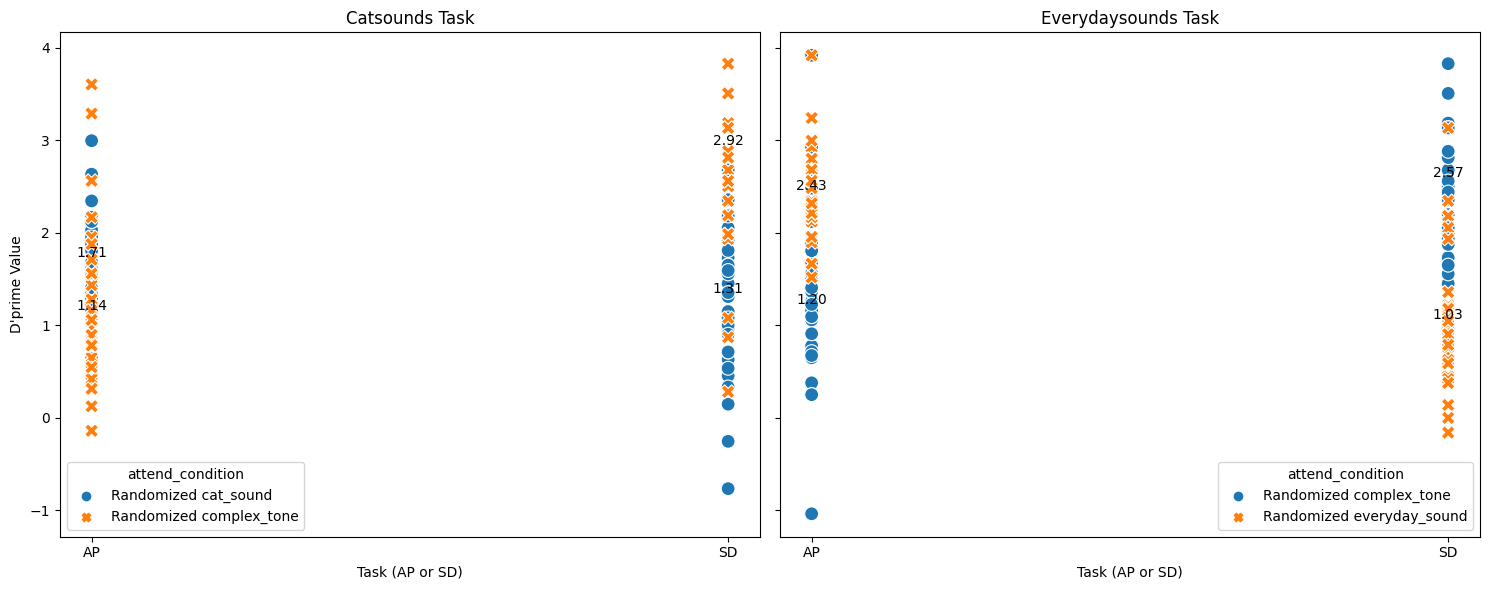

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Combine all dataframes into one for easier plotting
combined_df_1 = pd.concat([ap_df_cat, sd_df_cat])
combined_df_2 = pd.concat([ap_df_everyday, sd_df_everyday])
# Add a new column to distinguish between 'Catsounds' and 'Everydaysounds'
combined_df_1['Dataset'] = 'Catsounds'
combined_df_2['Dataset'] = 'Everydaysounds'

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for Catsounds
sns.scatterplot(ax=axes[0], data=combined_df_1, x='task', y='dprime', 
                hue='attend_condition', style='attend_condition', 
                markers=True, s=100)
axes[0].set_title('Catsounds Task')
axes[0].set_xlabel('Task (AP or SD)')
axes[0].set_ylabel('D\'prime Value')

# Calculate and annotate means for Catsounds
for (task, attend_condition), group in combined_df_1.groupby(['task', 'attend_condition']):
    mean_y = group['dprime'].mean()
    axes[0].text(x=task, y=mean_y, s=f'{mean_y:.2f}',
             color='black', ha='center', va='bottom')

# Plot for Everydaysounds
sns.scatterplot(ax=axes[1], data=combined_df_2, x='task', y='dprime', 
                hue='attend_condition', style='attend_condition', 
                markers=True, s=100)
axes[1].set_title('Everydaysounds Task')
axes[1].set_xlabel('Task (AP or SD)')
# axes[1].set_ylabel('D\'prime Value') # No need as y-axis is shared

# Calculate and annotate means for Everydaysounds
for (task, attend_condition), group in combined_df_2.groupby(['task', 'attend_condition']):
    mean_y = group['dprime'].mean()
    axes[1].text(x=task, y=mean_y, s=f'{mean_y:.2f}',
             color='black', ha='center', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
